In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
import os.path as op
from os import listdir
from os.path import isfile, join


In [2]:
raw=mne.io.read_raw_eeglab('C:\\USB Drive\\NewEEG-200s\\SA20140205\\20140205_1230.set',preload=True)

Reading C:\USB Drive\NewEEG-200s\SA20140205\20140205_1230.fdt
Reading 0 ... 838231  =      0.000 ...  1637.170 secs...


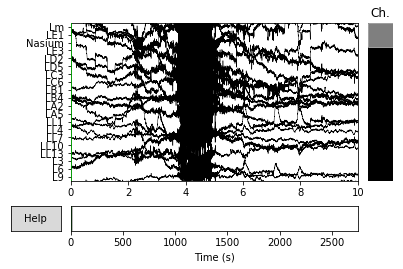

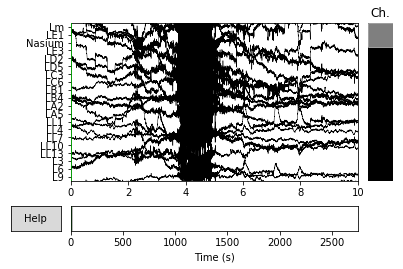

In [12]:
raw.plot()

In [5]:
epochs=mne.read_epochs_eeglab('C:\\USB Drive\\raw_data\\SA20140205\\20140205_1230.set', uint16_codec='utf-8')

Extracting parameters from C:\USB Drive\raw_data\SA20140205\20140205_1230.set...


AttributeError: 'NoneType' object has no attribute 'items'

In [25]:
rawfilter=raw.filter(3,10)

Setting up band-pass filter from 3 - 10 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 2.5 Hz
Filter length of 845 samples (1.650 sec) selected


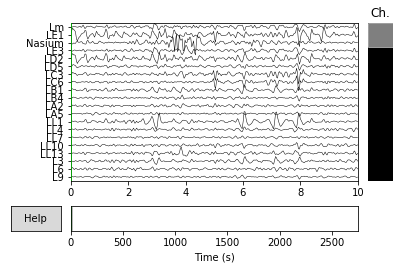

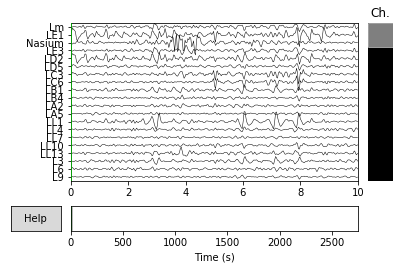

In [15]:
rawfilter.plot()

In [18]:
raw.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [32]:
mne.Epochs(raw,mne.read_events(raw))

AttributeError: 'RawEEGLAB' object has no attribute 'endswith'

In [29]:
mne.find_events(raw)

5798 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


ValueError: You have 3 events shorter than the shortest_event. These are very unusual and you may want to set min_duration to a larger value e.g. x / raw.info['sfreq']. Where x = 1 sample shorter than the shortest event length.

In [33]:
mne.read_events(raw)

AttributeError: 'RawEEGLAB' object has no attribute 'endswith'

In [6]:
raw.pick_types(meg=False, eeg=True, eog=True)

<RawEEGLAB  |  20140205_1230.fdt, n_channels x n_times : 128 x 838232 (1637.2 sec), ~818.9 MB, data loaded>

In [4]:
events = mne.find_events(raw, min_duration=1/raw.info['sfreq'], shortest_event=1)

5974 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5974 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


In [8]:
raw.crop(0, 20)

<RawEEGLAB  |  20140205_1230.fdt, n_channels x n_times : 129 x 10241 (20.0 sec), ~10.4 MB, data loaded>

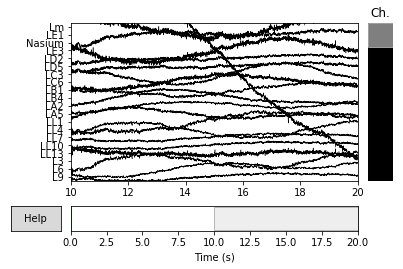

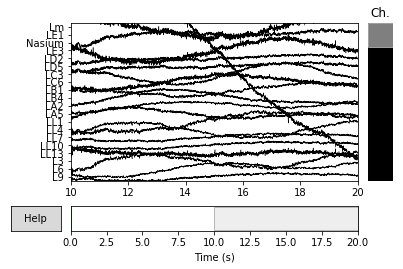

In [9]:
raw.plot(n_channels= 20, duration= 10, start=10)

In [39]:
rawfilter=raw.filter(10,100, fir_design='firwin')

Setting up band-pass filter from 10 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.5 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 677 samples (1.322 sec) selected


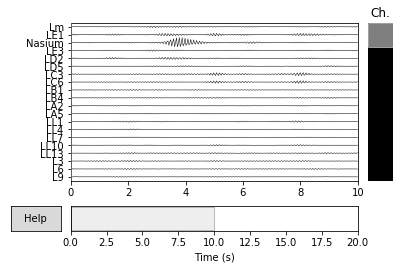

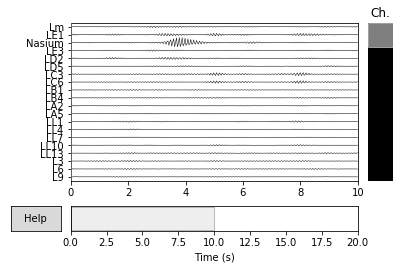

In [41]:
rawfilter.plot()

In [4]:
events = mne.find_events(raw, min_duration=1/raw.info['sfreq'], shortest_event=1)

5974 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


In [5]:
# event_id : this dictionary is created from information from Dave's dissertation page 27
concepts={1:'BABY',2:'BELL',3:'BIRD',4:'BURP',5:'DOG',6:'DRUM',
              7:'KNOCK',8:'LAUGH',9:'PHONE',10:'TRAIN',11:'WATER'}

event_id = {'trail_start':  31, 
            'left_button':  131, 
            'right_button': 132,
            'congruent':    133,
            'incongruent':  134,
            'correct':      129,
            'incorrect':    130,
            # targets
            't_baby' :        135,
            't_bell':         136,
            't_bird':         137,
            't_burp':         138,
            't_dog':          139,
            't_drum':         140,
            't_knock':        141,
            't_laugh':        142,
            't_phone':        143,
            't_train':        144,
            't_water':        145,
            #flankers
            'f_baby' :        155,
            'f_bell':         156,
            'f_bird':         157,
            'f_burp':         158,
            'f_dog':          159,
            'f_drum':         160,
            'f_knock':        161,
            'f_laugh':        162,
            'f_phone':        163,
            'f_train':        164,
            'f_water':        165,
}
# event codes 1 - 24 represent flanker and target stim codes. They are NOT explicity defined in dissertation.
for i in range(1,13):
    event_id["flanker_stim_{0}".format(i)] = i
    
for j in range(13, 25):
    event_id["target_stim_{0}".format(j)] = j

In [ ]:
epoch = mne.Epochs(raw, events=events, event_id = event_id, preload = True, )

5974 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5974 events and 359 original time points ...


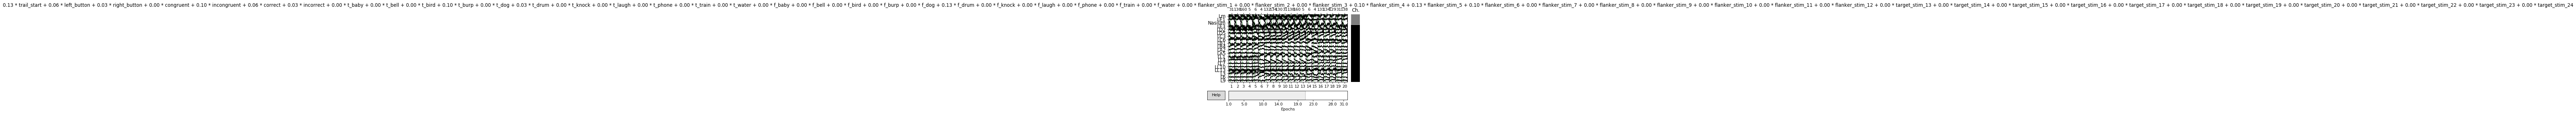

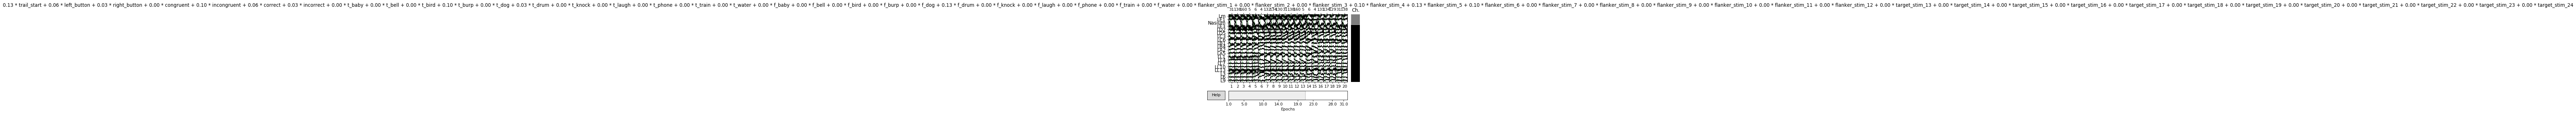

In [12]:
epoch.plot()

In [49]:
print('Original sampling rate:', epoch.info['sfreq'], 'Hz')

Original sampling rate: 512.0 Hz


In [52]:
epoch_resampled = epoch.copy().resample(100, npad='auto')
print('New sampling rate:', epoch_resampled.info['sfreq'], 'Hz')

New sampling rate: 100.0 Hz


In [ ]:
epoch.plot(n_channels=20, n_epochs=1,title="events")

In [7]:
X=epoch.get_data();
y=epoch.events[:, 2] 

In [16]:
print (x)

[[[-2.15344238e-06  4.61413574e-06 -1.27062988e-06 ... -1.46218262e-05
   -7.74401855e-06 -1.06864014e-05]
  [-3.47016270e-06  4.16167324e-06  6.44194668e-06 ...  1.14624545e-05
    7.54546230e-06  7.83989590e-06]
  [ 2.55120601e-05  2.71448726e-05  2.86761226e-05 ... -5.84566899e-05
   -6.20660649e-05 -6.50582524e-05]
  ...
  [-2.11770600e-06 -4.32450837e-06 -7.06462068e-06 ...  1.13805545e-05
    1.01852038e-05  1.04426654e-05]
  [-1.07059937e-05 -4.34307861e-06 -4.52697754e-06 ... -1.06964111e-06
   -4.49017334e-06 -9.05090332e-06]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 2.63885794e-06 -1.73797311e-06 -7.29168405e-06 ... -7.05267038e-06
   -2.33462495e-05 -2.45415620e-05]
  [ 5.01339692e-06 -1.91970855e-06 -5.67166167e-06 ...  1.21300961e-05
    1.15597836e-05  9.62911958e-06]
  [ 2.95728914e-05  2.88385164e-05  2.75885164e-05 ... -6.46927336e-05
   -6.72552336e-05 -6.90208586e-05]
  ...
  [-2.65065684e-06 -2.2

In [ ]:
epochs = epoch[(epoch.events[:,2] == 5) | (epoch.events[:,2] == 6)]
y=epochs.events[:, 2] 
X=epochs.get_data();

print(y)
print(X)

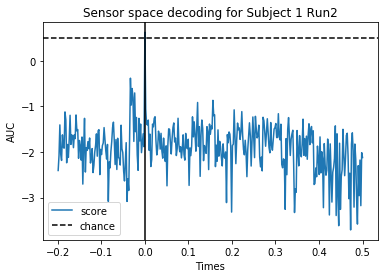

In [26]:
y=epochs.events[:, 2] 
X=epochs.get_data();
clf=make_pipeline(StandardScaler(), LinearRegression())

time_decod = SlidingEstimator(clf, n_jobs=1)

scores = cross_val_multiscore(time_decod, X, y, cv=8, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(epoch.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding for Subject 1 Run2')
plt.show()

In [27]:

def classify_test_KNN(X,y):

    clf = make_pipeline(Vectorizer(),
                        #StandardScaler(),
                        KNN(n_neighbors=11))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [31]:
clf = make_pipeline(Vectorizer(),StandardScaler(),
                        KNN(n_neighbors=13))
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
score = clf.score(X_test, y_test)
print (score)

0.6515151515151515


In [9]:

def filter_events(epochs, filter_for):

    if len(filter_for) >= len(epochs.event_id):
        return None
    
    else:
        temp_epochs = []
        for i in range(len(filter_for)):
            temp_epochs.append(epochs[epochs.events[:,-1] == filter_for[i]])
        
        return mne.concatenate_epochs(temp_epochs)

In [10]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)

ValueError: Found array with dim 3. Estimator expected <= 2.

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
ise= mne.decoding.UnsupervisedSpatialFilter(NMF(),average=False)
ise_data= ise.fit_transform(X)